# Machine Learning

## Linear regression (part 1)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 1).ipynb
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1. Create training dataset.
Create a univariate training dataset. The dataset consists of input data `X` and output data `Y`.

- **Step 1:** Create input data `X` of 20 elements in range `1..100` using `np.linspace` function (description below).
- **Step 2:** Calculate output data `Y` using below formula:
\begin{equation}
y = \frac{x}{4} + 25
\end{equation}
- **Step 3:** Add noise to data. Use `np.random.normal` function with `mean=0` and set `std` to standard deviation of `Y`.

See below desctiption of mentioned `numpy` functions:

#### **[np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)**


```python
numpy.linspace(start, stop, num)
```

Returns `num` evenly spaced samples, calculated over the interval `[start, stop]`.

**Parameters**
* `start` - The starting value of the sequence.
* `stop` - The end value of the sequence.
* `num` - Number of samples to generate. Default is 50. Must be non-negative.

**Example:**
```python
np.linspace(2.0, 3.0, num=5)
array([2.  , 2.25, 2.5 , 2.75, 3.  ])
```


#### [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

```python
random.normal(loc=0.0, scale=1.0, size=None)
```

Returns random samples from a normal (Gaussian) distribution.

**Parameters**
* `loc` - Mean ("centre") of the distribution.
* `scale` - Standard deviation (spread or “width”) of the distribution. Must be non-negative.
* `size` - Output shape.

**Example:**
```python
np.random.normal(3, 2.5, size=(2, 4))
array([[-4.49401501,  4.00950034, -1.81814867,  7.29718677],   # random
       [ 0.39924804,  4.68456316,  4.99394529,  4.84057254]])  # random
```

In [2]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
X = np.linspace(1, 100, num=20)
Y = 0.25 * X + 25 
print("X: ", X)
print("Y: ", Y)
noise = np.random.normal(loc = 0.0, scale = Y.std(), size = 20)
print("Noise: ", noise)
Y += noise
print("Y + Noise: ", Y)

X:  [  1.           6.21052632  11.42105263  16.63157895  21.84210526
  27.05263158  32.26315789  37.47368421  42.68421053  47.89473684
  53.10526316  58.31578947  63.52631579  68.73684211  73.94736842
  79.15789474  84.36842105  89.57894737  94.78947368 100.        ]
Y:  [25.25       26.55263158 27.85526316 29.15789474 30.46052632 31.76315789
 33.06578947 34.36842105 35.67105263 36.97368421 38.27631579 39.57894737
 40.88157895 42.18421053 43.48684211 44.78947368 46.09210526 47.39473684
 48.69736842 50.        ]
Noise:  [ 16.07568865  -4.29122716  -1.97029943  -3.889945    -1.82070898
   9.28319208 -13.5810404   -1.43461889  -3.6253931    6.85703076
   1.83170674   4.47829148   6.82340207   3.88352145  -8.70956247
   5.73699805   8.75165449  15.03584962   8.5107981   -3.68346747]
Y + Noise:  [41.32568865 22.26140442 25.88496373 25.26794974 28.63981734 41.04634997
 19.48474907 32.93380217 32.04565953 43.83071497 40.10802252 44.05723885
 47.70498101 46.06773198 34.77727963 50.52647173 54

### Task 2. Display the samples.
To display the samples use `plt.scatter` function.

Example:
```python
plt.figure()
plt.scatter(X, Y)
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('y')
```

Text(0, 0.5, 'y')

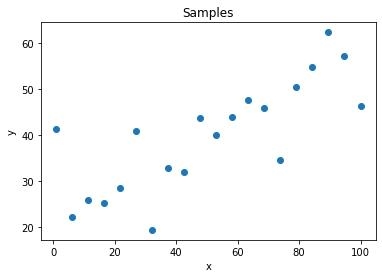

In [3]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
plt.figure()
plt.scatter(X, Y)
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('y')

## Task 3. Write a function.
You already know the exact function (it is the same as you used while generating the dataset), but in this task let's imagine you do NOT know the exact function parameters. Assume that you only know that the function is defined by below formula:
$$
y = ax + b
$$.
Your task is to implement above function in python.


In [4]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
def fun(X, a, b = 0):
    return a * X + b

## Task 4. Display the output of the function.
Set the parameters `a=-0.5`, `b=0` and display the function output at the same chart with samples from task 2.

Example:
```python
plt.figure()
plt.title('Function')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y)
pred = fun(X, -0.5) # the function fun is implemented in previous task
plt.plot(X, pred, color='r')
```

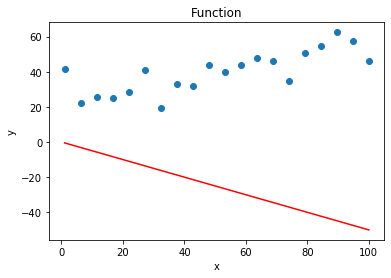

In [5]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
plt.figure()
plt.title('Function')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y)
pred = fun(X, -0.5) # the function fun is implemented in previous task
plt.plot(X, pred, color='r')

## Task 5. Cost function.

Write a cost function that calculates how much the prediction differs from the expected values. The cost function takes two parameters `Yt` (correct values - ground truth) and `Yp` (prediction). Use the Root Mean Squared Error (RMSE) as the metric:
$$
\textit{RMSE(Yt, Yp)} = \sqrt{\frac{1}{n}\sum_{i=0}^{n-1}{(\textit{Yp} - \textit{Yt})^2}}
$$

In [6]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
def RMSE(Yt, Yp):
    return np.sqrt(np.square(Yp - Yt).mean())

## Task 6. Display the cost function for different values of parameter `a`.
Plot the cost function for different values of parameter `a` (set the parameter `b = 0`). Check 20 values in range between -2 and 2.

_You will notice that the function drops until particular value and then increases. The point where the function achieves the minimum is the solution._

NOTE: Use the `plt.plot` to draw the chart.

Text(0, 0.5, 'RMSE')

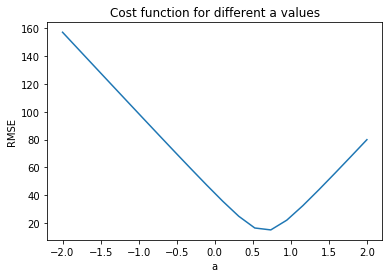

In [7]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
A = np.linspace(-2, 2, 20)
Yp = [fun(X, a) for a in A]
costs = [RMSE(Y, yp) for yp in Yp]

plt.plot(A, costs)
plt.title('Cost function for different a values')
plt.xlabel('a')
plt.ylabel('RMSE')

## Task 7. Display the cost function for different values of parameters `a` and `b`.
Plot the cost function for different values of parameter `a` and `b`. Use below range:

| Variable | Range    |
| :------- | -------: |
| `a`      | -2..2    |
| `b`      | -50..100 |

To display this chart use 3D projection. `np.meshgrid` function can be used to generate the coordinates. Example:

```python
# ...
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')
plt.title("Cost function")
A, B = np.meshgrid(A, B)
ax.plot_surface(A, B, cost, cmap="gist_ncar")
```

_NOTE: `%matplotlib notebook` makes the chart interactive._


In [25]:
%matplotlib notebook
import itertools as it
from mpl_toolkits.mplot3d import Axes3D
# >>> WRITE YOUR CODE BELOW <<<
A = np.linspace(-2, 2, 20)
B = np.linspace(-50, 100, 20)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')
plt.title("Cost function")
A, B = np.meshgrid(A, B)
cost = []
for aa, bb in zip(A, B):
    for a, b in zip(aa, bb):
        Yp = fun(X, a, b)
        c = RMSE(Y, Yp)
        #cost.append(c)
cost = np.array(cost).reshape((20, 20))
print(cost.shape)

ax.plot_surface(A, B, cost, cmap="gist_ncar")

<IPython.core.display.Javascript object>

TypeError: only integer scalar arrays can be converted to a scalar index

## Write conclusions
Write your conclusions.

By finding the minimum of the cost function we can estimate which parameters best approximate the linear function
From the meshgrid we can see that correct parameters should be:
    a = 0.25
    b = 25

<IPython.core.display.Javascript object>


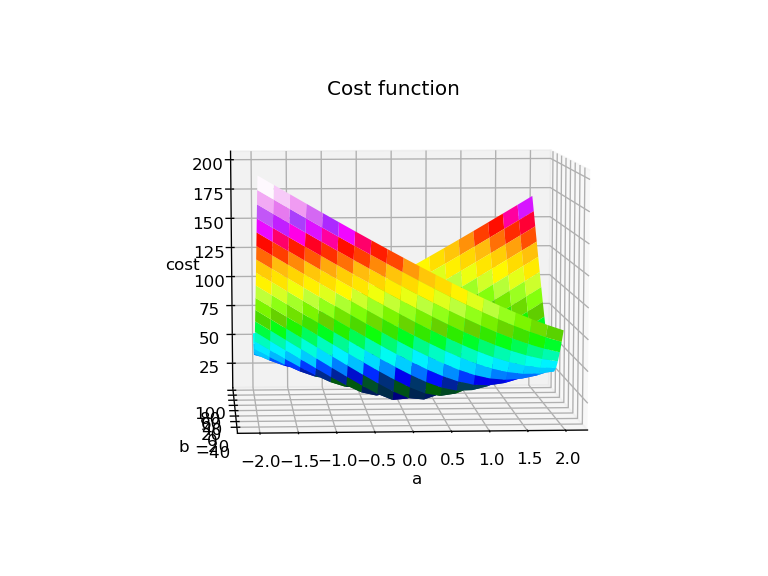

(20, 20)


In [26]:
import itertools as it
from mpl_toolkits.mplot3d import Axes3D
# >>> WRITE YOUR CODE BELOW <<<
A = np.linspace(-2, 2, 20)
B = np.linspace(-50, 100, 20)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')
plt.title("Cost function")
cost = []
for a in A:
    for b in B:
        Yp = fun(X, a, b)
        c = RMSE(Y, Yp)
        cost.append(c)
cost = np.array(cost).reshape((20, 20))

A, B = np.meshgrid(A, B)

print(cost.shape)

ax.plot_surface(A, B, cost, cmap="gist_ncar")